In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import cho_factor, cho_solve
import sympy as sp

In [123]:
def coeff_linear(x_data, y_data):
    n = len(x_data)
    M = np.ones((n, 2))
    M[:, 1] = x_data[:]

    A = M.T@M
    b = M.T@y_data
    # print(M)
    # print(y_data)
    # print(A, b)
    coeff = cho_solve(cho_factor(A), b)
    return coeff

def coeff_linear_spline(x_data, y_data, c):
    n = len(x_data)
    M = np.ones((n, 3))
    M[:, 1] = x_data[:]

    A = M.T@M
    b = M.T@y_data

    for i in range(n):
        if x_data[i] < c:
            M[i, 2] = 0
        else:
            M[i, 2] = 1

    A = M.T@M
    b = M.T@y_data

    coeff = cho_solve(cho_factor(A), b)
    return coeff

### Linear

In [22]:
def linear_fit(a, x):
    """
    phi(x) = a0 + a1x
    """
    return np.dot(a, [1, x])

def linear_spline_fit(a, x, c):
    """
    phi(x) = a0 + a1x + a2(x - c)
    """
    return np.dot(a, [1, x, 0])

### NonLinear

In [23]:
def exponential_fit(A, x):
    """
    y = ae^(xb) 
    ln(y) = ln(a) + b*x
    Y = A + BX = A[0] + A[1]X
    """
    a = np.e**A[0]
    b = A[1]
    # print(a, b)
    return a*np.e**(b*x)

def polynomial_fit(A, x):
    """
    y = ax^b 
    ln(y) = ln(a) + b *ln(x)
    Y = A + BX = A[0] + A[1]X
    """
    a = np.e**A[0]
    b = A[1]
    return a*x**b

def rational_fit(A, x):
    """
    y = 1/(a + bx)
    z = a + bx, where z = 1/y 
    """
    return 1/(A[0] + A[1]*x)

### Error
$$
E=\sqrt{\frac{\sum_{i=1}^{N}\left(y_{i}-\varphi\left(x_{i}\right)\right)^{2}}{N}}
$$

In [121]:
def error(phi: "sympy function", x, x_data, y_data):
    n = len(x_data)
    E = 0.0
    for i in range(n):
        E += (y_data[i] - phi.subs(x, x_data[i]))**2
    E = (E/n)**0.5
    return E

### Linear and NonLinear Fit

In [137]:
x_data = np.array([500, 700, 900, 1100, 1300, 1500, 1700, 1900.0])
y_data = np.array([365, 361.6, 370.64, 379.68, 384.46, 395.5, 395.95, 397])

coeff_lin = coeff_linear(x_data, y_data)

coeff_exp = coeff_linear(x_data, np.log(y_data))
coeff_pol = coeff_linear(np.log(x_data), np.log(y_data))
coeff_rat = coeff_linear(x_data, 1/y_data)

In [138]:
a, b = coeff_lin[0], coeff_lin[1] 
x = sp.symbols('x')
print("Linear")
p_lin = a + b*x
p_lin

Linear


0.0282803571428574*x + 347.292321428571

In [139]:
a, b = np.e**coeff_exp[0], coeff_exp[1] 
print("Exponential")
p_exp = a*sp.exp(b*x)
p_exp

Exponential


348.466271516682*exp(7.43624195452464e-5*x)

In [140]:
a, b = np.e**coeff_pol[0], coeff_pol[1] 
print("Polynomial")
p_pol = a*x**b
p_pol

Polynomial


220.612945852717*x**0.0779932001255476

In [141]:
a, b = coeff_rat[0], coeff_rat[1] 
print("Rational")
p_rat = 1/(a + b*x)
p_rat

Rational


1/(0.00286115665503447 - 1.95650921528253e-7*x)

### Plot

ERROR = 3.63222647249630


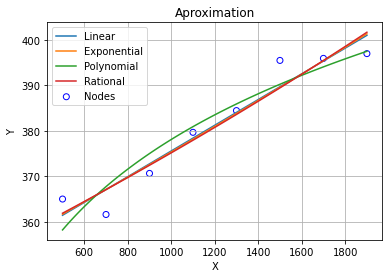

In [142]:
# Session 03 Aproximation    
x_interval = np.linspace(x_data[0], x_data[-1], 100)

print("ERROR =", error(p_rat, x, x_data, y_data))
plt.scatter(x_data, y_data, facecolors='none', edgecolors='b')
plt.plot(x_interval, [p_lin.subs(x, i) for i in x_interval])
plt.plot(x_interval, [p_exp.subs(x, i).evalf() for i in x_interval])
plt.plot(x_interval, [p_pol.subs(x, i) for i in x_interval])
plt.plot(x_interval, [p_rat.subs(x, i) for i in x_interval])
plt.title("Aproximation")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(("Linear", "Exponential","Polynomial", "Rational", "Nodes"))
plt.grid(True)
plt.show()

### Examen Parcial, Pregunta 4

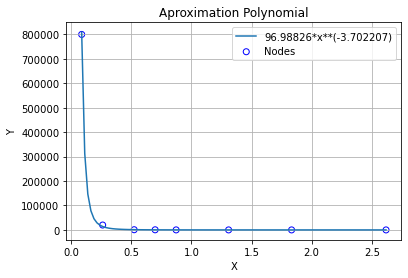

In [143]:
x_data = np.array([0.087266, 0.261799, 0.523599, 0.698132, 0.872665, 1.308997, 1.832596, 2.617994])
y_data = np.array([800000, 20000, 800, 500, 107, 26, 8, 5.0])

coeff_pol = coeff_linear(np.log(x_data), np.log(y_data))
a, b = np.e**coeff_pol[0], coeff_pol[1] 

p_pol = a*x**b

x_interval = np.linspace(x_data[0], x_data[-1], 100)

plt.scatter(x_data, y_data, facecolors='none', edgecolors='b')
plt.plot(x_interval, [p_pol.subs(x, i) for i in x_interval])
plt.title("Aproximation Polynomial")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend((sp.N(p_pol, 7), "Nodes"))
plt.grid(True)
plt.show()